## Basic Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from fastai.vision import *
from pathlib import Path
from utils import *
import matplotlib.pyplot as plt
import cv2

In [3]:
learn = load_learner('/Users/rahulsomani/01_github_projects/shot-type-classifier/models', file='shot-type-classifier.pkl');

In [4]:
path = Path('/Users/rahulsomani/Desktop/test-videos/interstellar-splits/')

## Reading in Video with `cv2`

Somehow, when reading in videos with `cv2`, the last 5 frames always get skipped.

In [5]:
cap = cv2.VideoCapture(str(path/'shot#1.mp4'))
cap.get(cv2.CAP_PROP_FRAME_COUNT)

21.0

In [6]:
frames = []

i=0
cap = cv2.VideoCapture(str(path/'shot#1.mp4'))
while True:
    ret, frame = cap.read()
    #frames.append(frame) if ret==True else None
    if ret == True: frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    else: break
cap.release()

16

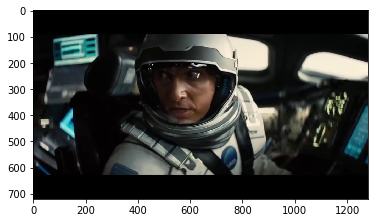

In [7]:
len(frames)
plt.imshow(frames[15])

In [8]:
img = pil2tensor(frames[0], np.float32).div_(255)
img = Image(img)

In [9]:
learn.predict(img)

(Category Medium Close-Up,
 tensor(5),
 tensor([6.1743e-03, 1.1459e-03, 4.5230e-05, 3.9622e-04, 2.4369e-02, 9.6787e-01]))

## Reading in Video with `ffmpeg-python`

In [5]:
def predict(x):
    preds = learn.predict(x)
    return f'{preds[0]} ({"{:.3f}".format(preds[2][preds[1]])})'

np_to_img = lambda x: Image(pil2tensor(x, np.float32).div_(255))

In [6]:
vid = read_video_tensor(path/'shot#1.mp4')
vid = [np_to_img(x) for x in vid]

In [7]:
vid[0::10]

[Image (3, 720, 1280), Image (3, 720, 1280), Image (3, 720, 1280)]

In [8]:
i=5
[predict(x) for x in vid[0::i]]

['Medium Close-Up (0.968)',
 'Medium Close-Up (0.973)',
 'Medium Close-Up (0.963)',
 'Medium Close-Up (0.968)',
 'Medium Close-Up (0.971)']